# EDA on Cocoa confectionary imports (18062010) to South Africa (Kg)

# DATA IMPORT

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

df = pd.read_csv('chocolate.csv')
df.head(10)

,tradetype,districtofficecode,districtofficename,countryoforigin,countryoforiginname,countryofdestination,countryofdestinationname,tariff,statisticalunit,transportcode,transportcodedescription,yearmonth,calendaryear,tariffanddescription,statisticalquantity,customsvalue,worldregion
0,Imports,DBN,Durban,IE,Ireland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,7026.70,94453,EUROPE
1,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201003,2010,18062010 - Chocolate and sugar confectionery c...,55462.00,2042006,EUROPE
2,Imports,DBN,Durban,BE,Belgium,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,23160.00,724672,EUROPE
3,Imports,CTN,Cape Town,CH,Switzerland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,19445.00,1253110,EUROPE
4,Imports,CTN,Cape Town,BR,Brazil,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,4180.93,31603,AMERICA
5,Imports,DBN,Durban,CH,Switzerland,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,1615.00,92143,EUROPE
6,Imports,CTN,Cape Town,IT,Italy,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,3120.00,222034,EUROPE
7,Imports,FBB,Ficksburg Bridge,LS,Lesotho,ZA,South Africa,18062010,KG,3,Road,201001,2010,18062010 - Chocolate and sugar confectionery c...,502.00,18623,AFRICA
8,Imports,JSA,O.R. Tambo Int Airport,FR,France,ZA,South Africa,18062010,KG,0,Transport mode not specified (Unknown - Other),201001,2010,18062010 - Chocolate and sugar confectionery c...,1000.00,22875,EUROPE
9,Imports,KFN,Kopfontein,BW,Botswana,ZA,South Africa,18062010,KG,3,Road,201001,2010,18062010 - Chocolate and sugar confectionery c...,75.50,2769,AFRICA


In [2]:
df.shape

(1000, 17)

## ANALYZE DATA 

### Categorical Data
districtofficename, countryoforiginname, 

#### Ordinal
transportcodedescription, worldregion  

### Numerical Data
#### Continuous
statisticalquantity, customsvalue, calendaryear

### Mixed Discrete Data
yearmonth (mix of year and numerical month)

### Redundant Data
tradetype, countryofdestination, countryofdestinationname, tariff, tariffanddescription, statisticalunit, transportcode, districtofficecode, countryoforigin

### Features that may contain Errors
Errors my be linked to user capture error in categorical or numerical data. WorldRegion would also benefit from correcting WorldRegion and split(between N.America and S.America)

### Features that contain null\empty\blank entries
* transportcodedescription > countryoforigin contain missing values
* transportcodedescription > countryoforigin incomplete dataset

## REDUNDANT DATA 
* all data, and codes reflects chocolate imports to South Africa (can be incorporated into heading)
* ie. Cocoa confectionary imports (18062010) to South Africa in KG
* all units measured in kilograms
* all transport codes have better descriptions (use that column)
* information already available in yearmonth
* district office code has better descriptions to use
* Country of origin has descriptors available in seperate column

In [3]:
df = df.drop(['tradetype',
              'countryofdestination', 
              'countryofdestinationname', 
              'tariff', 
              'tariffanddescription', 
              'statisticalunit', 
              'transportcode',
              'districtofficecode',
              'countryoforigin'], axis=1)

df.head(10)

,districtofficename,countryoforiginname,transportcodedescription,yearmonth,calendaryear,statisticalquantity,customsvalue,worldregion
0,Durban,Ireland,Transport mode not specified (Unknown - Other),201001,2010,7026.70,94453,EUROPE
1,Durban,Belgium,Transport mode not specified (Unknown - Other),201003,2010,55462.00,2042006,EUROPE
2,Durban,Belgium,Transport mode not specified (Unknown - Other),201001,2010,23160.00,724672,EUROPE
3,Cape Town,Switzerland,Transport mode not specified (Unknown - Other),201001,2010,19445.00,1253110,EUROPE
4,Cape Town,Brazil,Transport mode not specified (Unknown - Other),201001,2010,4180.93,31603,AMERICA
5,Durban,Switzerland,Transport mode not specified (Unknown - Other),201001,2010,1615.00,92143,EUROPE
6,Cape Town,Italy,Transport mode not specified (Unknown - Other),201001,2010,3120.00,222034,EUROPE
7,Ficksburg Bridge,Lesotho,Road,201001,2010,502.00,18623,AFRICA
8,O.R. Tambo Int Airport,France,Transport mode not specified (Unknown - Other),201001,2010,1000.00,22875,EUROPE
9,Kopfontein,Botswana,Road,201001,2010,75.50,2769,AFRICA


## PRELIMINARY DATA CORRECTION

In [4]:
# Column Names
df.columns =['Port', 'Exporter', 'Transport', 'Month', 'Year', 'Quantity', 'CustomsValue', 'WorldRegion']

In [5]:
# Fix Month Data
df['Month'] = pd.to_datetime(df['Month'], format='%Y%m').dt.strftime('%b')

In [6]:
# North and South America split - US and other
df.loc[(df.Exporter == 'United States'), 'WorldRegion'] = 'N.AMERICA'
df['WorldRegion'] = df['WorldRegion'].replace('AMERICA', 'S.AMERICA')

## MISSING DATA

### Identify Missing Data

In [7]:
df_data = df
df_data['Transport'] = df_data['Transport'].replace('Transport mode not specified (Unknown - Other)', np.NAN)
df_data['Exporter'] = df_data['Exporter'].replace('Unclassified', np.NAN)

In [8]:
df.head()

,Port,Exporter,Transport,Month,Year,Quantity,CustomsValue,WorldRegion
0,Durban,Ireland,NaN,Jan,2010,7026.70,94453,EUROPE
1,Durban,Belgium,NaN,Mar,2010,55462.00,2042006,EUROPE
2,Durban,Belgium,NaN,Jan,2010,23160.00,724672,EUROPE
3,Cape Town,Switzerland,NaN,Jan,2010,19445.00,1253110,EUROPE
4,Cape Town,Brazil,NaN,Jan,2010,4180.93,31603,S.AMERICA


In [9]:
missing =df.isnull().sum()
missing

Port              0
Exporter          3
Transport       202
Month             0
Year              0
Quantity          0
CustomsValue      0
WorldRegion       0
dtype: int64

### Imputate Missing Data

#### 1) Transport Values (202 values missing)

* Ascertain Transport based on receiving office
* Method of transport can be derived from noting receiving port

         Maritime Ports: 'Durban', 'Cape Town', 'Johannesburg', 'Port Elizabeth', 'Pretoria', 'Germiston/Alberton'
         
         Airports:       'O.R. Tambo Int Airport', 'Cape Town Int Airport', 'King Shaka Int Airport', 'Bloemfontein'
         
         Road Ports:     'Ficksburg Bridge', 'Kopfontein', 'Narogas', 'Vioolsdrif', 'Maseru Bridge', 'Border Gate', 
                         'Oshoek', 'Skilpadshek', 'Ramatlabama', 'Caledonspoort'

In [10]:
# Maritime
df_temp = df.loc[df['Transport'] == 'Maritime']
mar_list = df_temp['Port'].unique().tolist()

#Air
df_temp = df.loc[df['Transport'] == 'Air']
air_list = df_temp['Port'].unique().tolist()

#Road
df_temp = df.loc[df['Transport'] == 'Road']
road_list = df_temp['Port'].unique().tolist()

df.loc[df['Port'].isin(mar_list), 'Transport'] = 'Maritime'
df.loc[df['Port'].isin(air_list), 'Transport'] = 'Air'
df.loc[df['Port'].isin(road_list), 'Transport'] = 'Road'

# notice Beit Bridge is outlyer - no other data - assume road due to nature of Beit Bridge port and based location
df.loc[(df['Port'] == 'Beit Bridge'),'Transport'] = 'Road'

#### 2) Exporter Values (3 values missing)

* Conclude all port entries through Kopfontein relate to Botswana (only missing 3 values - all other samples relate Country 'Botswana' to port 'Kopfontein'
* Incorrect 'South Africa' values for exporter, change to 'Botswana' due to entry port INTO SA from Botswana


In [141]:
df.loc[(df.Port == 'Kopfontein'), 'Exporter'] = 'Botswana'
df.head()

,Port,Exporter,Transport,Month,Year,Quantity,CustomsValue,WorldRegion
0,Durban,Ireland,Maritime,Jan,2010,7026.70,94453,EUROPE
1,Durban,Belgium,Maritime,Mar,2010,55462.00,2042006,EUROPE
2,Durban,Belgium,Maritime,Jan,2010,23160.00,724672,EUROPE
3,Cape Town,Switzerland,Maritime,Jan,2010,19445.00,1253110,EUROPE
4,Cape Town,Brazil,Maritime,Jan,2010,4180.93,31603,S.AMERICA


## DATA STORIES AND VISUALISATIONS
Examine cases with single variable: Univariant Analysis         

In [12]:
df.describe()

,Year,Quantity,CustomsValue
count,1000.000000,1000.000000,1.000000e+03
mean,2012.311000,11982.813820,4.595701e+05
std,1.620156,30331.838152,1.193868e+06
min,2010.000000,0.010000,2.000000e+00
25%,2011.000000,59.625000,3.317000e+03
50%,2012.000000,1049.750000,4.507850e+04
75%,2014.000000,7053.775000,2.824558e+05
max,2015.000000,253600.000000,1.208207e+07


### Exporter  and Transport Frequency Analysis

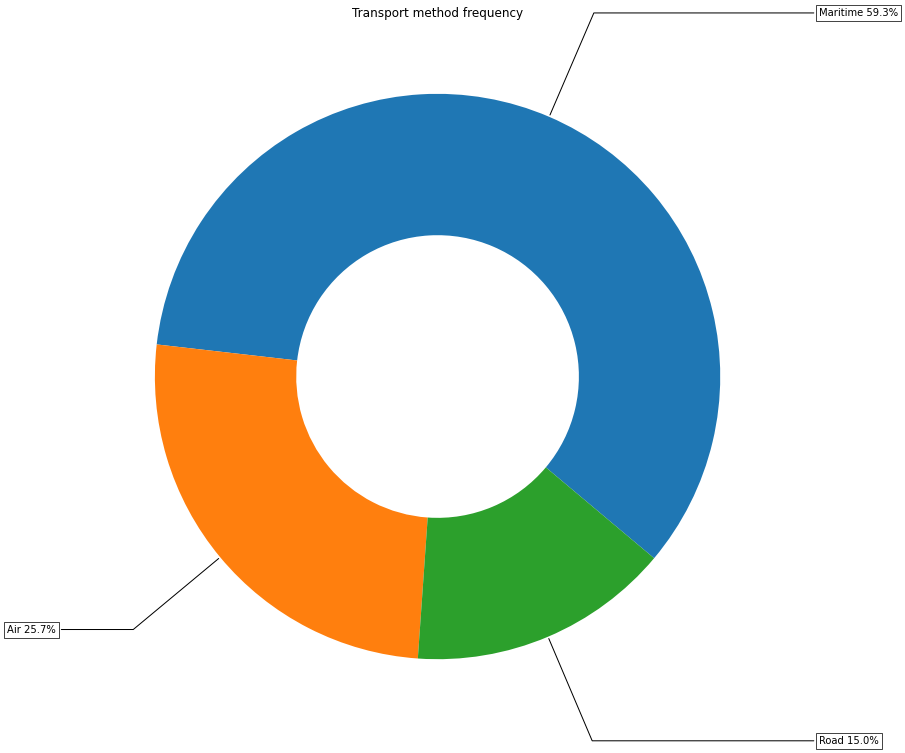

In [13]:

fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(aspect="equal"))

labels = ['Maritime', 'Air', 'Road']
data = (df['Transport'].value_counts())/10
comb = []
for x, y in zip(labels, data):
    comb.append(f'{x} {y}%')

wedges, texts = ax.pie(df['Transport'].value_counts(), wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(comb[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Transport method frequency")

plt.show()


### Conclusion

* Most chocolate imports are transported via Maritime Shipping (59.3%), followed by Air(25.7%) and Road(15.05)


### Mean CustomsValue and Quantity Imported

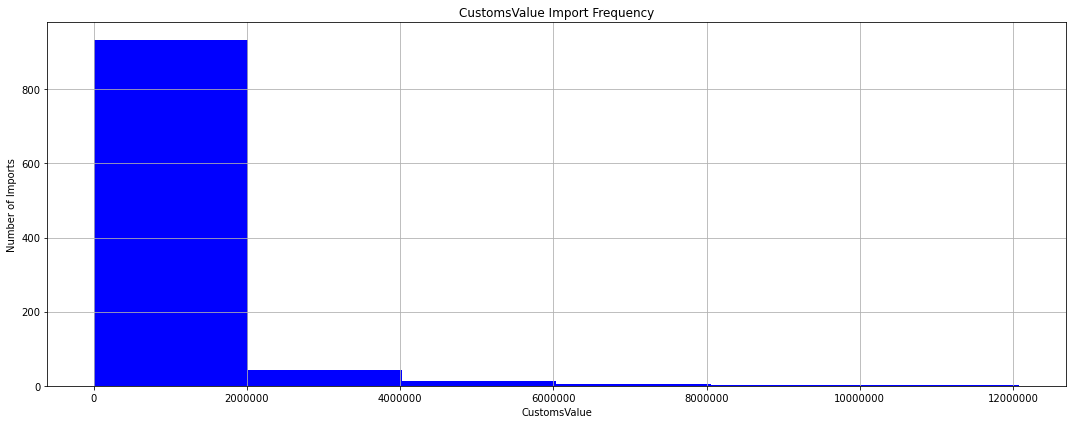

In [131]:
df[['CustomsValue']].hist(figsize=(15,6),bins=6,color='blue')
# 2 plt.figure(figsize=(10,8))
plt.ticklabel_format(style='plain', axis='x',useOffset=False);
plt.title("CustomsValue Import Frequency")
plt.ylabel('Number of Imports')
plt.xlabel('CustomsValue')
plt.tight_layout()
plt.show()

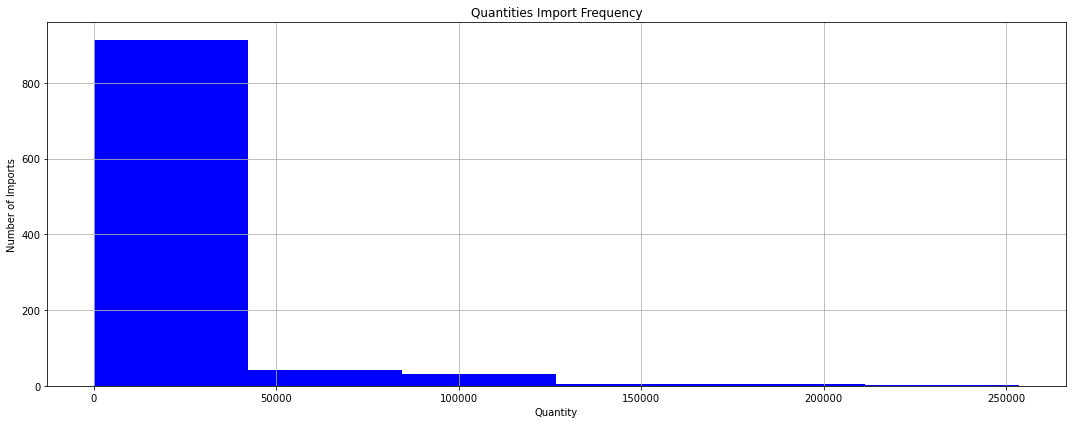

In [132]:
df[['Quantity']].hist(figsize=(15,6),bins=6,color='blue')
# 2 plt.figure(figsize=(10,8))
plt.ticklabel_format(style='plain', axis='x',useOffset=False);
plt.title("Quantities Import Frequency")
plt.ylabel('Number of Imports')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()

### Conclusion

* The highsets and average Quantity of 45000kg of chocolate is imported monthly, contributing R2 000 000 on average
* Chocolate is rarely imported at higher volumes

### Import Frequency by Locale

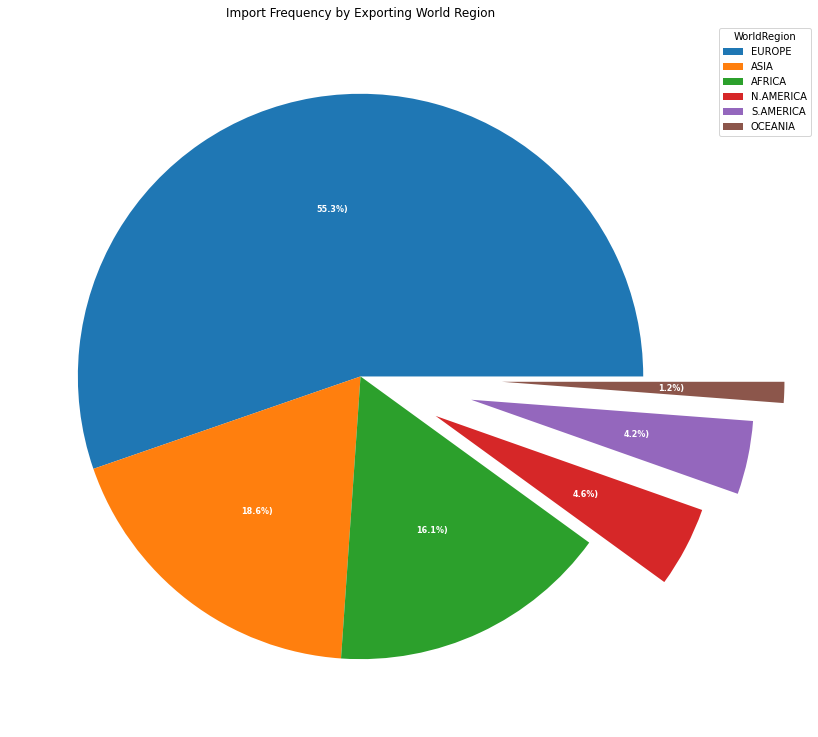

In [111]:

explode = (0, 0, 0, 0.3, 0.4, 0.5)  

fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(aspect="equal"))

labels = ['EUROPE', 'ASIA', 'AFRICA', 'N.AMERICA', 'S.AMERICA', 'OCEANIA']

data = df['WorldRegion'].value_counts()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), explode=explode)

ax.legend(wedges, labels,
          title="WorldRegion",
          loc="upper left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Import Frequency by Exporting World Region")

plt.show()



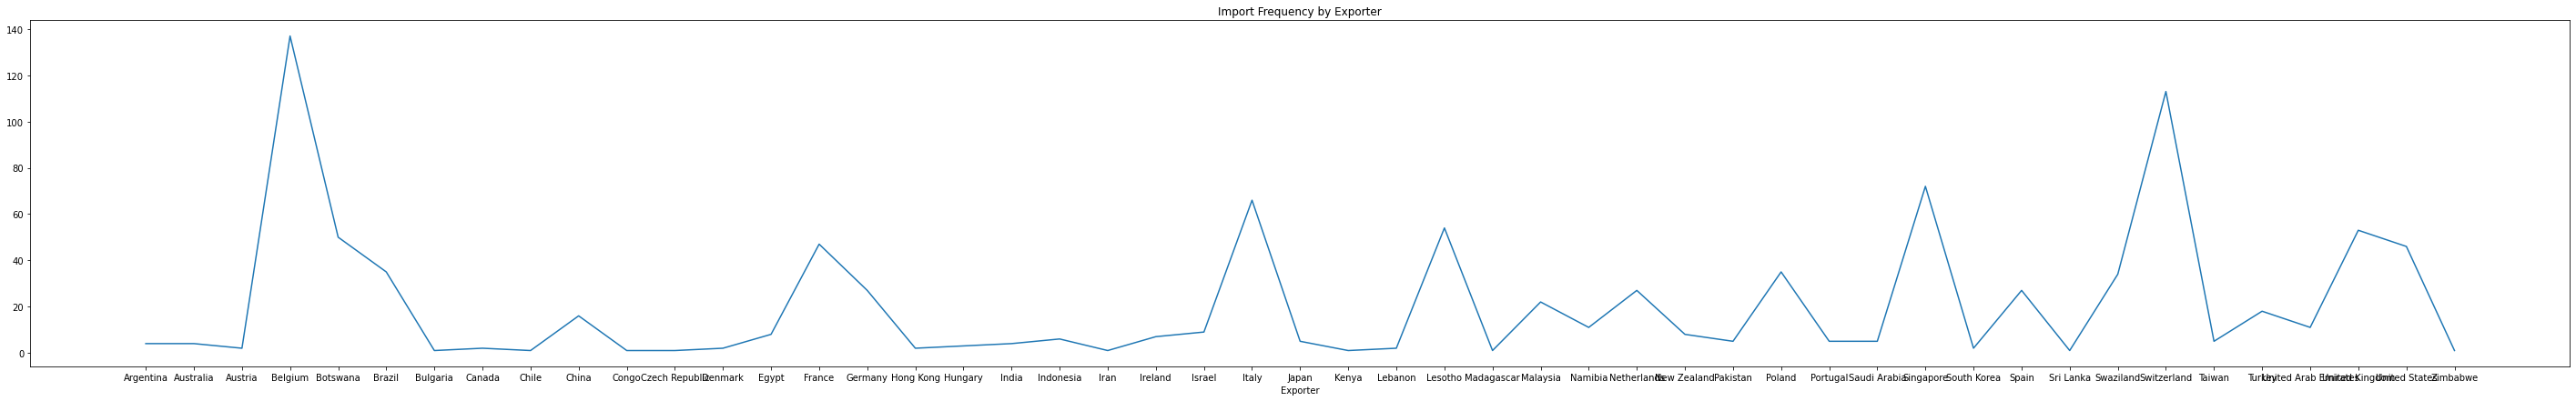

In [128]:
list_names = df['Exporter'].unique()
test = df['CustomsValue'].groupby(df['Exporter']).size()
plt.xticks(np.arange(49), list_names)
plot_month = test.plot(title = 'Import Frequency by Exporter', figsize=(50, 7))

### Conclusion

* Europe, Asia and Africa contribute most to the SA import of chocolate
* The Americas contributing ver little, with Oceania (Australia and New Zealand) contributing the least

* The largest importers by captital are Belgium, Switzerland, Signapore, Italy, Botswana, France and UK

### Import Frequency Analysis

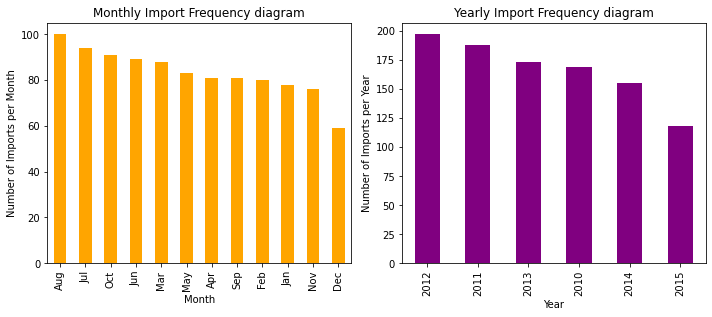

In [17]:
plt.figure(2)

##############################################
plt.subplot(221)
df['Month'].value_counts().plot(figsize=(10,8),kind='bar',color='orange')
plt.title("Monthly Import Frequency diagram")
plt.ylabel('Number of Imports per Month')
plt.xlabel('Month');

plt.subplot(222)
df['Year'].value_counts().plot(figsize=(10,8),kind='bar',color='purple')
plt.title("Yearly Import Frequency diagram")
plt.ylabel('Number of Imports per Year')
plt.xlabel('Year');

plt.tight_layout()
plt.show()


### Conclusion

* Winter Months (Mar-Aug) see the highest volums of imports, with as much as a 40% difference in imports during summer
* 2011 and 2012(max) saw the largest import volumes, tapering off steaply (-75%) in 2015


### Port Use Frequency Analysis

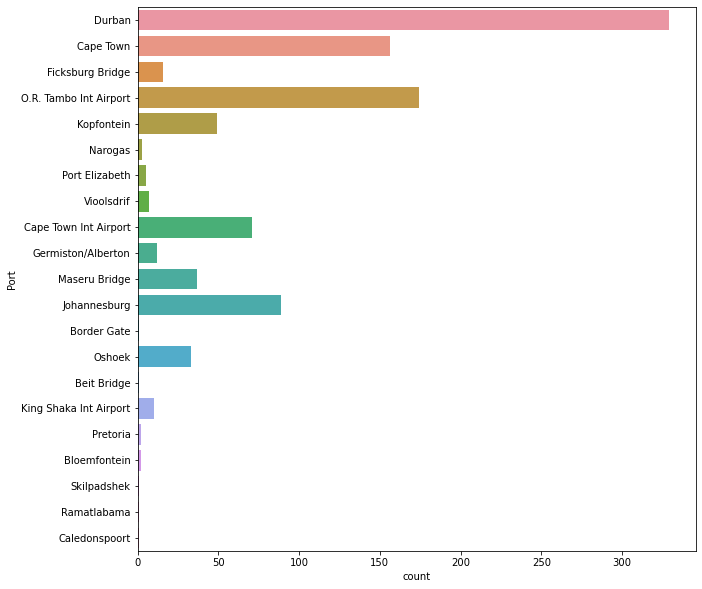

In [18]:
fig = plt.figure(figsize=(10,10))
sns.countplot(y=df['Port'], data=df);

### Conclusion

* The most popular ports for import by shipping are based in Durban and Capetown
* OR Thambo Int Airport managing larger quantities than that of Cape Twon Harbor

### CustomsValue Contribution by world region

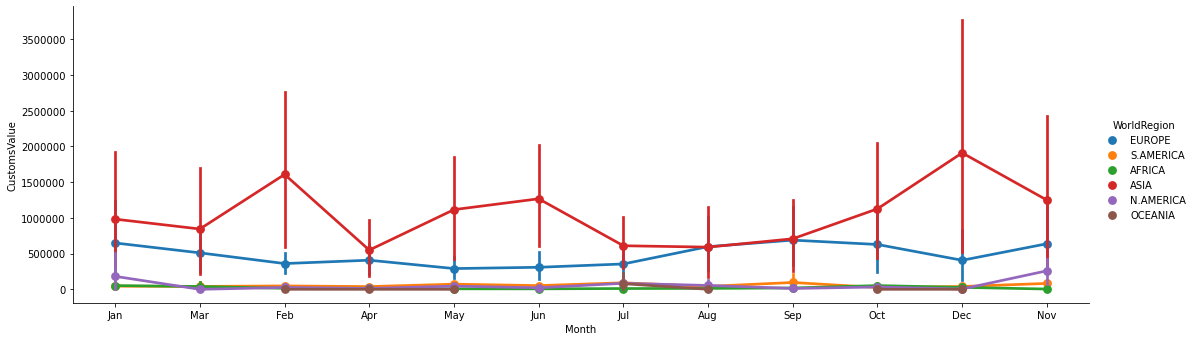

In [100]:
sns.catplot(data=df, x="Month", y="CustomsValue", hue="WorldRegion" ,kind="point", height=5, aspect=3)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


### Conclusion

* In terms of Value contribution from CustomsValues, we note that seasonal February and December sees large import of chocolate from Asian countries - presumably to maintain demand for festivities (Valentines Day and Christmas)
* Note the large guage to indicate the volatility during the times of trade as price vary largerly from a high of R3.5m imposed, to a low of R75 000. This may be due to larger competitive markets competeing for chocolate at the sime time
* Interestingly, colder months also see a spike in demand and customsValue by Asian countries

### CustomsValue Contribution by Importer

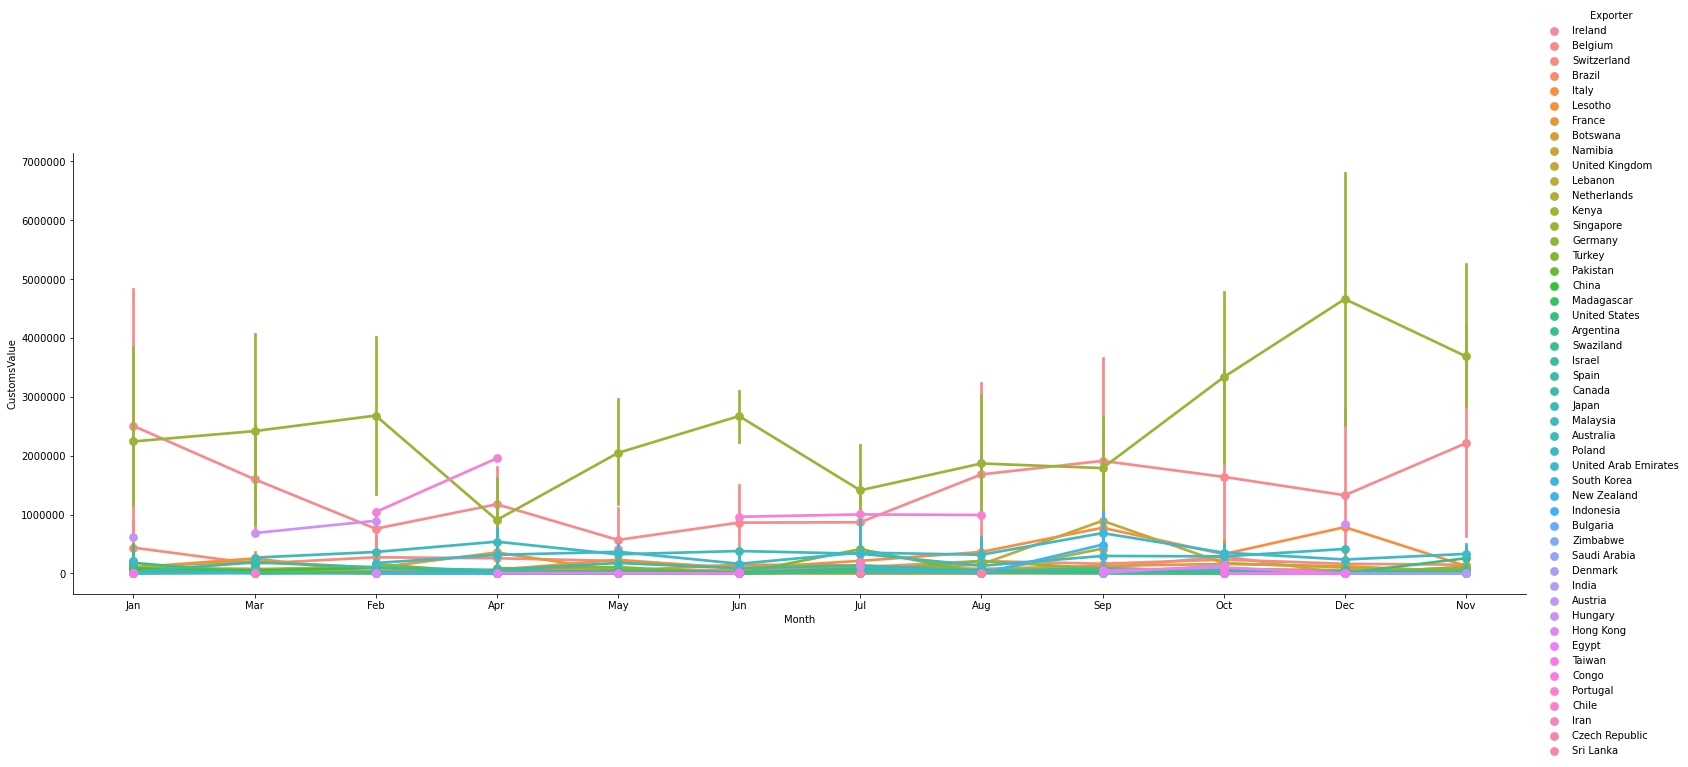

In [103]:
sns.catplot(data=df, x="Month", y="CustomsValue", hue="Exporter" ,kind="point",height=7, aspect=3)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)


### Conclusion

* By country alone, we see Singapore is by far the single largest contributor to our Chocolate Customs Market, outstripping the world renowed chocolate manufacture Belgium by as much as 4x fold. 
* Notice the peaks and troughs match the larger Asian contribution, in terms of shape and scale - supporting the conclusion that Singapore is SA's largest importer of chocolates

### CustomsValue Related to Quantity Imported

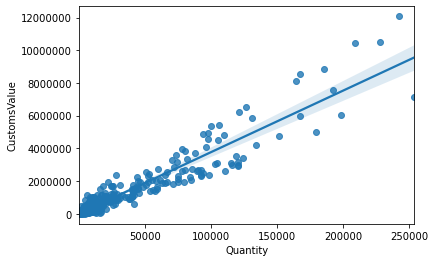

In [39]:
fig, ax = plt.subplots()
ax.ticklabel_format(style='plain')
ax = sns.regplot(x="Quantity", y="CustomsValue", data=df)
plt.show()

### Conclusion

* Customsvalue remains largely stable in lower qauntities imported
* Although linear pricing trend is noted, we see a more upward weighted distribution of chocolates toward larger quantities imported. 
* We can assume that larger quantities imported are subjected to larger global competition 

### CustomsValue Related to Quantity Imported

<Figure size 432x288 with 0 Axes>

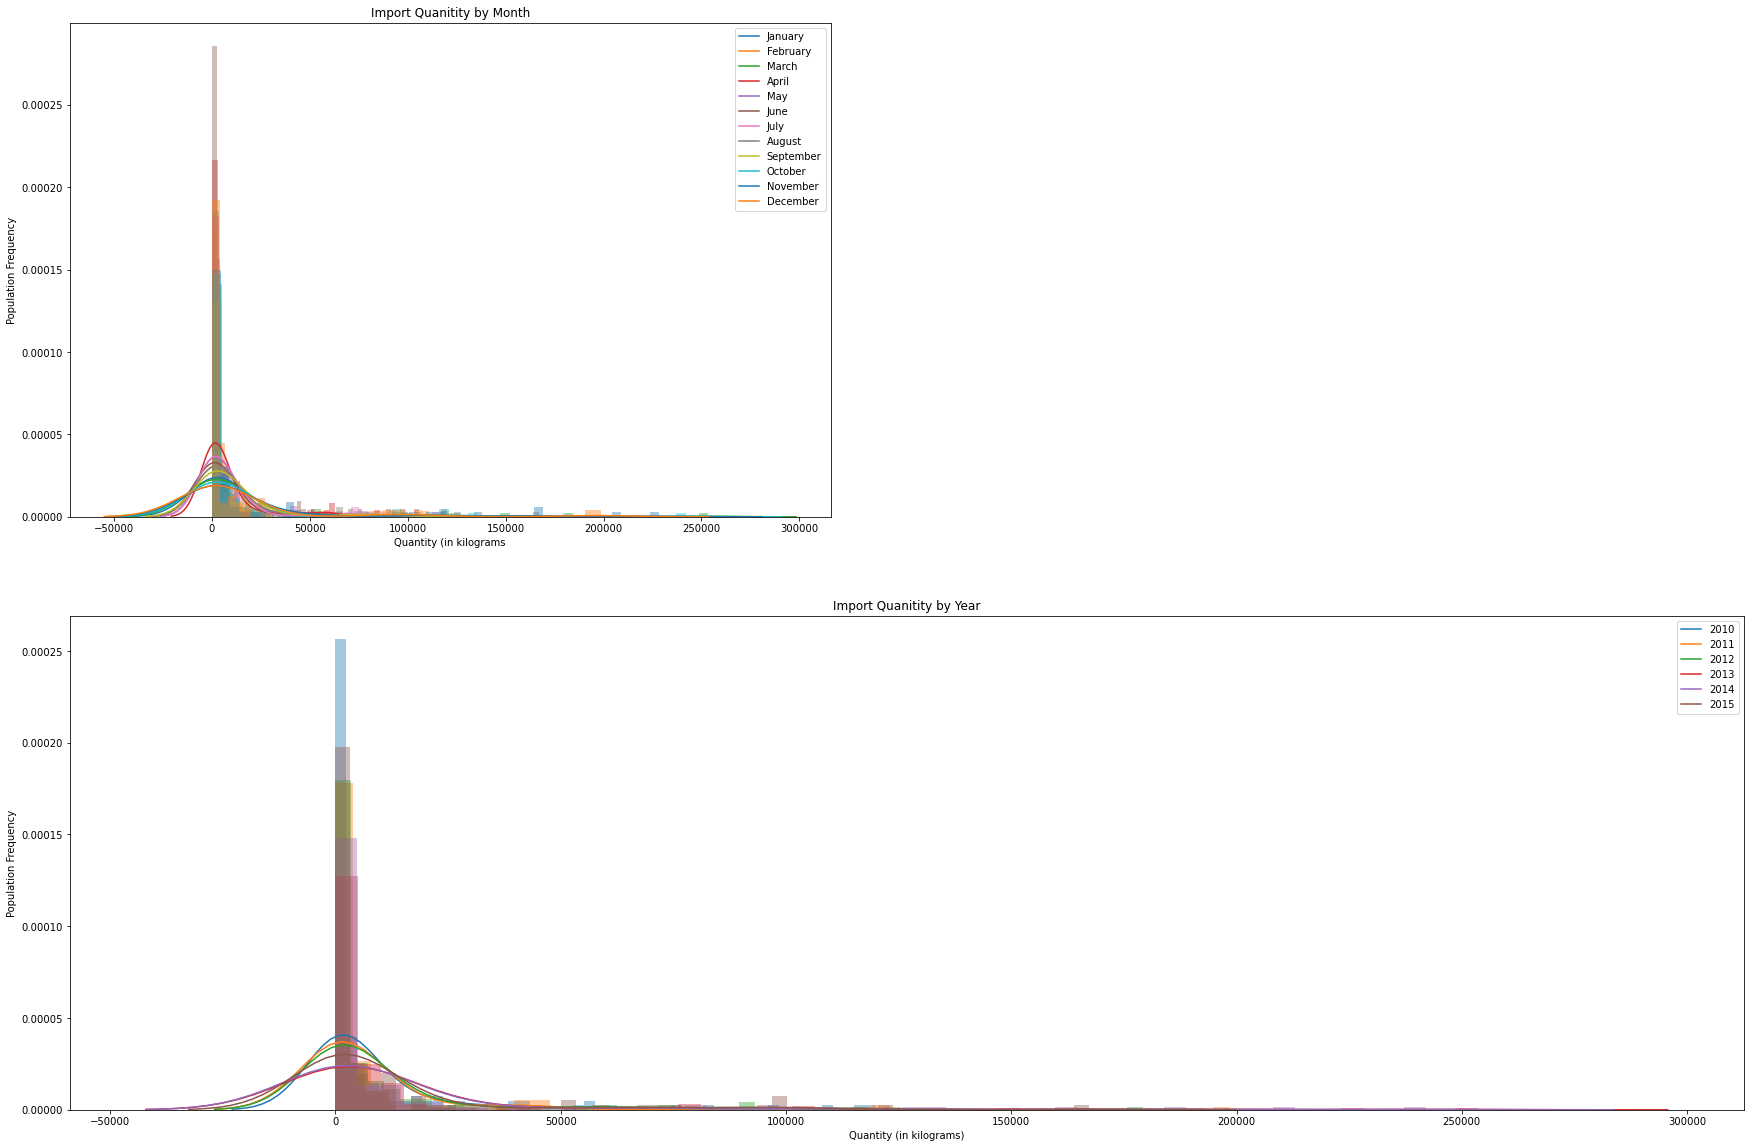

In [140]:
plt.figure(2)
plt.figure(figsize=(30,20))



##############################################
plt.subplot(221)
sns.distplot(df.loc[df['Month'] == 'Jan']['Quantity'], kde_kws={'label': 'January'});
sns.distplot(df.loc[df['Month'] == 'Feb']['Quantity'], kde_kws={'label': 'February'});
sns.distplot(df.loc[df['Month'] == 'Mar']['Quantity'], kde_kws={'label': 'March'});
sns.distplot(df.loc[df['Month'] == 'Apr']['Quantity'], kde_kws={'label': 'April'});
sns.distplot(df.loc[df['Month'] == 'May']['Quantity'], kde_kws={'label': 'May'});
sns.distplot(df.loc[df['Month'] == 'Jun']['Quantity'], kde_kws={'label': 'June'});
sns.distplot(df.loc[df['Month'] == 'Jul']['Quantity'], kde_kws={'label': 'July'});
sns.distplot(df.loc[df['Month'] == 'Aug']['Quantity'], kde_kws={'label': 'August'});
sns.distplot(df.loc[df['Month'] == 'Sep']['Quantity'], kde_kws={'label': 'September'});
sns.distplot(df.loc[df['Month'] == 'Oct']['Quantity'], kde_kws={'label': 'October'});
sns.distplot(df.loc[df['Month'] == 'Nov']['Quantity'], kde_kws={'label': 'November'});
sns.distplot(df.loc[df['Month'] == 'Dec']['Quantity'], kde_kws={'label': 'December'});
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Import Quanitity by Month");
plt.ylabel('Population Frequency');
plt.xlabel('Quantity (in kilograms');
plt.ticklabel_format(style='plain', axis='y');


plt.subplot(212)
sns.distplot(df.loc[df['Year'] == 2010]['Quantity'], kde_kws={'label': '2010'});
sns.distplot(df.loc[df['Year'] == 2011]['Quantity'], kde_kws={'label': '2011'});
sns.distplot(df.loc[df['Year'] == 2012]['Quantity'], kde_kws={'label': '2012'});
sns.distplot(df.loc[df['Year'] == 2013]['Quantity'], kde_kws={'label': '2013'});
sns.distplot(df.loc[df['Year'] == 2014]['Quantity'], kde_kws={'label': '2014'});
sns.distplot(df.loc[df['Year'] == 2015]['Quantity'], kde_kws={'label': '2015'});
plt.ticklabel_format(style='plain', axis='both',useOffset=False);
plt.title("Import Quanitity by Year");
plt.ylabel('Population Frequency');
plt.xlabel('Quantity (in kilograms)');

plt.show()

### Conclusion

* On Average, we note that April is set to see the largest number of for small Quantities imported
* It is noted that the majority of the imports of small volume

* 2010 sees the market and subsequent imports demand larger imports of chocolates
* 2013 and 2014 saw market imports drop 45% in quantity